In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans

In [98]:
df = pd.read_csv('combined_datasets.csv')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         609 non-null    int64  
 1   category           609 non-null    object 
 2   product            609 non-null    object 
 3   Original_price     583 non-null    float64
 4   price              609 non-null    float64
 5   perc_of_unit_sold  522 non-null    float64
 6   rating             427 non-null    float64
 7   shpping_rate       567 non-null    object 
 8   gender             581 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 42.9+ KB


### data dimension 

In [100]:
df.shape

(609, 9)

In [101]:
df.head()

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men


### check for missing values 

In [102]:
df.isnull().sum()

Unnamed: 0             0
category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

### replacing missing value

In [103]:
mean_oprice = df['Original_price'].mean()
median_perc = df['perc_of_unit_sold'].median()
median_rating = df['rating'].median()
replace_values = {'Original_price':mean_oprice, 'perc_of_unit_sold': median_perc,'rating':median_rating}
df.fillna(value=replace_values, inplace=True)
df['gender'].fillna(value='Unisex', inplace=True)
df['shpping_rate'].fillna(value='not free shipping', inplace=True)

In [104]:
df.isnull().sum()

Unnamed: 0           0
category             0
product              0
Original_price       0
price                0
perc_of_unit_sold    0
rating               0
shpping_rate         0
gender               0
dtype: int64

### check for dublicated data

In [105]:
df.duplicated().sum()

0

### droping unwanted columns 

In [106]:
df.drop('Unnamed: 0',axis=1)

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,88.0,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,88.0,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...
604,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
606,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
607,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


###  descriptive statistics 

In [107]:
df.describe()

,Unnamed: 0,Original_price,price,perc_of_unit_sold,rating
count,609.000000,609.000000,609.000000,609.000000,609.000000
mean,60.072250,864.498113,339.434039,58.009852,87.865353
std,47.287663,1764.385443,285.416406,23.558994,9.561518
min,0.000000,42.000000,21.400000,2.000000,20.000000
25%,21.000000,279.000000,140.980000,42.000000,86.000000
50%,46.000000,529.000000,262.490000,60.000000,88.000000
75%,92.000000,950.000000,444.990000,75.000000,92.000000
max,179.000000,29970.000000,3220.000000,99.000000,100.000000


### Distribution plot of ratings in the dataset

<Axes: xlabel='rating', ylabel='Density'>

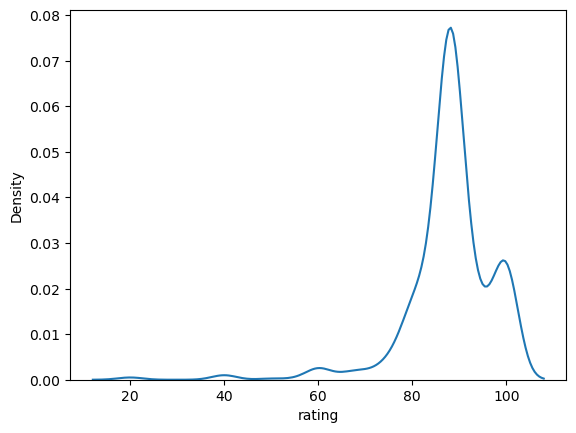

In [108]:
sns.kdeplot(df["rating"])

### Distribution plot of  perc_of_unit_sold in the dataset 

<Axes: xlabel='perc_of_unit_sold', ylabel='Density'>

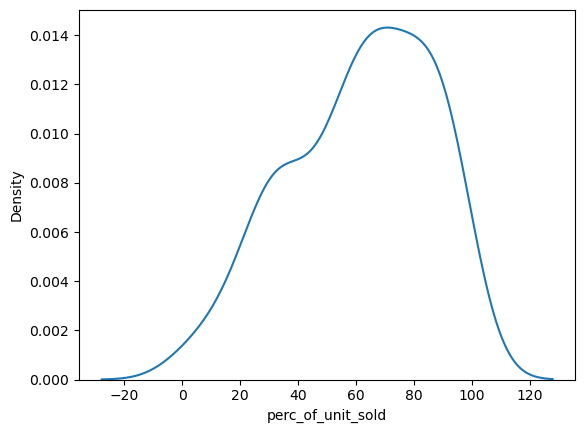

In [125]:
sns.kdeplot(df["perc_of_unit_sold"])

### data Visualizations

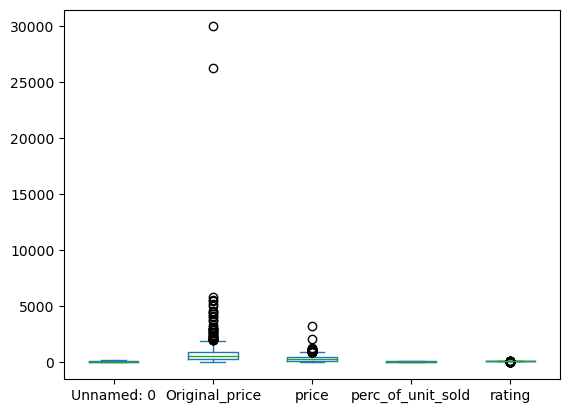

In [110]:
df.plot(kind='box')
plt.show()

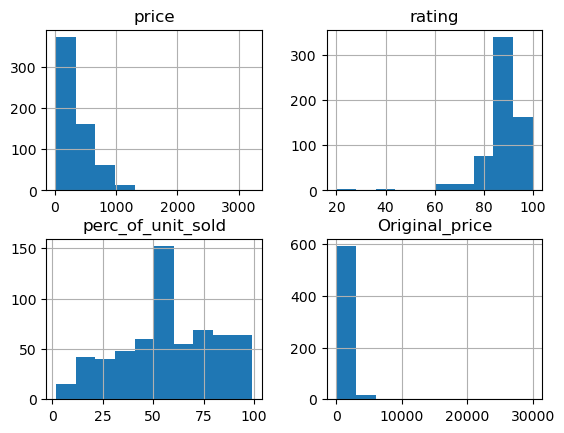

In [111]:
# select specific columns
cols = ['price', 'rating','perc_of_unit_sold','Original_price']

# create a histogram of the selected columns
df[cols].hist(bins=10)
plt.show()

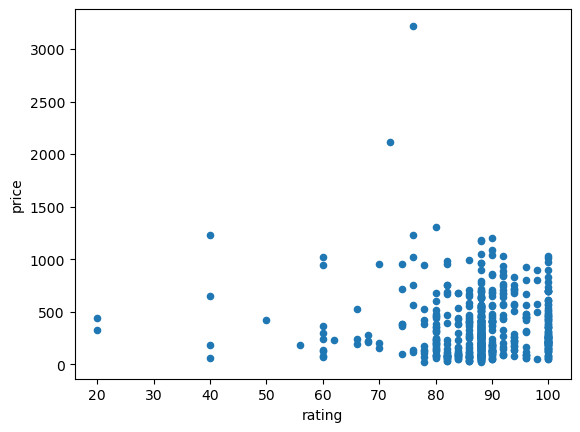

In [112]:
df.plot(x='rating', y='price', kind='scatter')
plt.show()

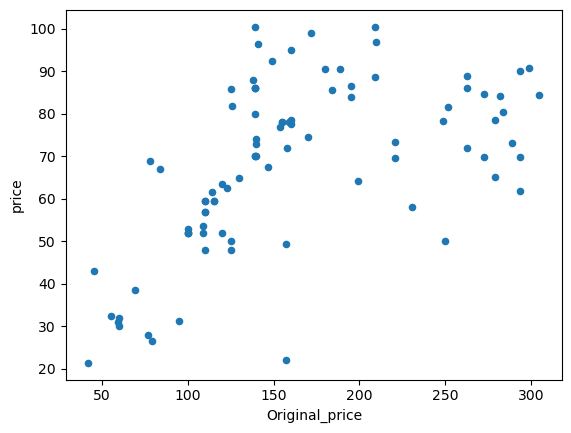

In [124]:
df.plot(x='Original_price', y='price', kind='scatter')
plt.show()

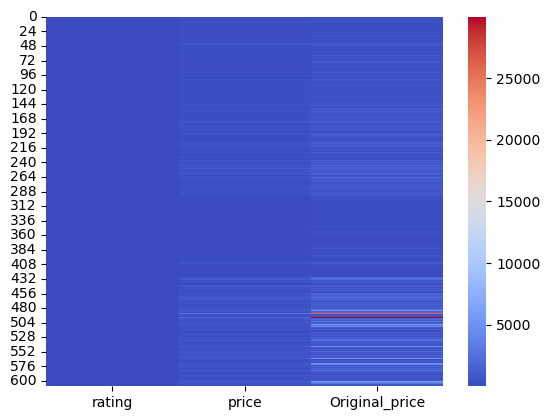

In [114]:
# select specific columns
cols = ['rating', 'price', 'Original_price']

sns.heatmap(df[cols], cmap='coolwarm')
plt.show()

### handling outliers in the dataset

In [122]:
threshold_A = df['Original_price'].mean() + 2 * df['Original_price'].std()
threshold_B = df['price'].mean() + 2 * df['price'].std()
threshold_B = df['rating'].mean() + 2 * df['rating'].std()

# filter the dataframe to exclude outliers in columns 'A' and 'B'
df = df[(df['Original_price'] < threshold_A) & (df['price'] < threshold_B) & (df['rating'] < threshold_B)]

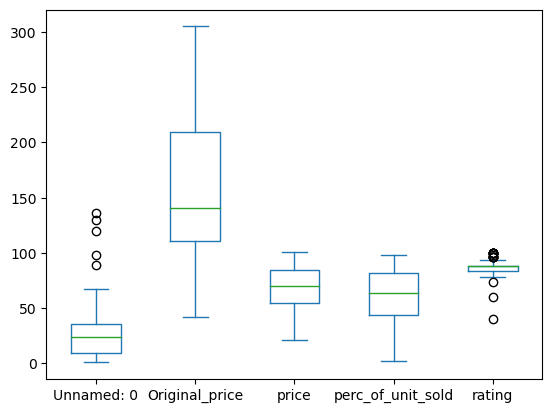

In [123]:
df.plot(kind='box')
plt.show()

### correlations between the numeric variables in the dataset 

In [128]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

df_numeric.corr()

,Unnamed: 0,Original_price,price,perc_of_unit_sold,rating
Unnamed: 0,1.000000,-0.073520,0.049044,0.039716,-0.067974
Original_price,-0.073520,1.000000,0.561060,0.320120,-0.160018
price,0.049044,0.561060,1.000000,-0.031595,0.012878
perc_of_unit_sold,0.039716,0.320120,-0.031595,1.000000,0.018802
rating,-0.067974,-0.160018,0.012878,0.018802,1.000000


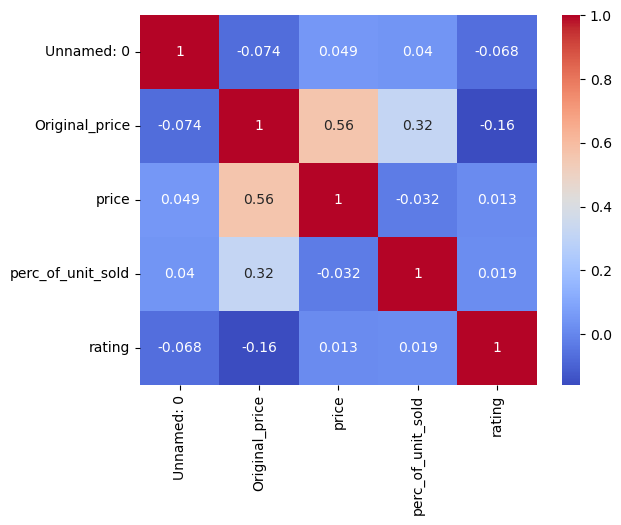

In [129]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr = df_numeric.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

### Clustering

C:\Users\mi900\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mi900\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mi900\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mi900\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

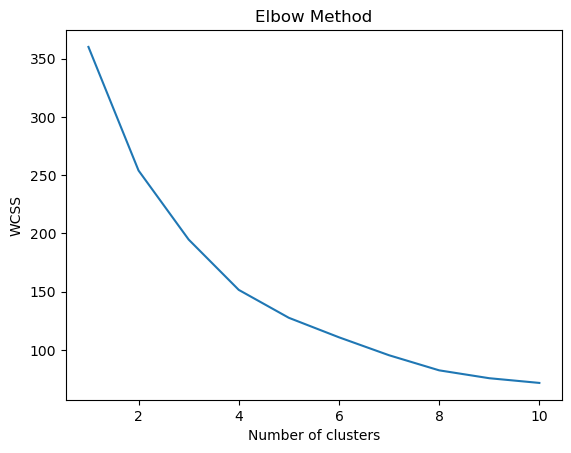

C:\Users\mi900\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mi900\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='price', ylabel='perc_of_unit_sold'>

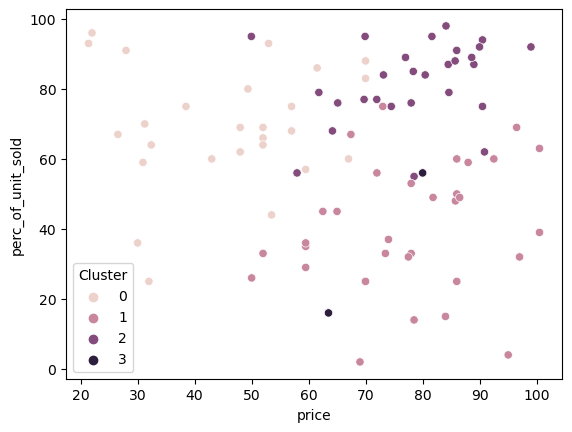

In [131]:
from sklearn.preprocessing import StandardScaler
# Select the features to be used in clustering
X = df[['Original_price', 'price', 'perc_of_unit_sold', 'rating']]

# X = df[['Shipping Eligibility','price']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame
df['Cluster'] = y_kmeans

# Visualize the clusters
sns.scatterplot(x='price', y='perc_of_unit_sold', hue='Cluster', data=df)


<Axes: xlabel='Original_price', ylabel='rating'>

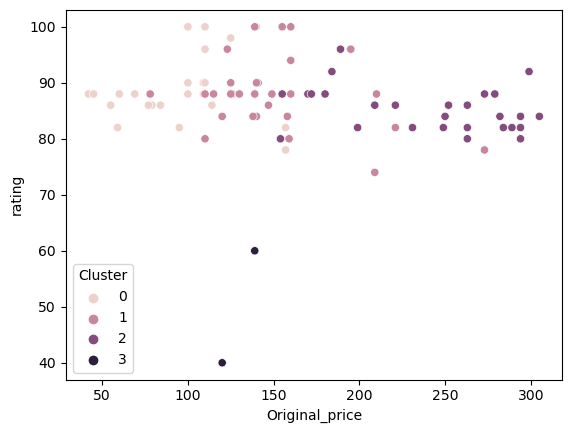

In [132]:
sns.scatterplot(x='Original_price', y='rating', hue='Cluster', data=df)

### Encoding

In [133]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [134]:
# exclude non-numeric columns
numeric_cols = ['price', 'rating']
cluster_stats = df[numeric_cols + ['Cluster']].groupby('Cluster').mean()

print(cluster_stats)


             price     rating
Cluster                      
0        45.838519  89.259259
1        77.407879  88.242424
2        78.400357  85.357143
3        71.735000  50.000000


In [135]:
revenue_by_cluster = df.groupby('Cluster')['price'].sum()
print(revenue_by_cluster)

Cluster
0    1237.64
1    2554.46
2    2195.21
3     143.47
Name: price, dtype: float64


In [139]:
# Import the LabelEncoder class from the sklearn library
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'gender' column
df['gender'] = label_encoder.fit_transform(df['gender'])

# Encode the 'category' column
df['category'] = label_encoder.fit_transform(df['category'])

# Encode the 'product' column
df['product'] = label_encoder.fit_transform(df['product'])

In [137]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
cluster_means = df.groupby('Cluster').mean()

# Print the result
print(cluster_means)

         Unnamed: 0  category  Original_price      price  perc_of_unit_sold  \
Cluster                                                                       
0         26.074074  3.185185       97.037037  45.838519          67.888889   
1         27.151515  3.121212      150.515152  77.407879          40.090909   
2         33.178571  2.285714      242.000000  78.400357          82.142857   
3         17.000000  3.500000      129.500000  71.735000          36.000000   

            rating  
Cluster             
0        89.259259  
1        88.242424  
2        85.357143  
3        50.000000  


C:\Users\mi900\AppData\Local\Temp\ipykernel_19056\1649464195.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()
